In [32]:
import pandas as pd
# from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
N_JOBS = 5

In [ ]:
# data.to_csv('cs-training1.csv', sep=',')

In [ ]:
# data = pd.read_csv('cs-training1.csv').drop('Unnamed: 0', axis = 1)

In [34]:
# data1 = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis = 1)
data = pd.read_csv('dataset/train1.csv').drop('Unnamed: 0', axis = 1)
data[:6]

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,w,debt_consolidation,21.45,955.75,90000.0,20.91,Verified,D,23448,4,0,MORTGAGE,1,11.407565,1,0
1,w,debt_consolidation,18.06,289.47,65000.0,12.74,Source Verified,D,13362,2,0,MORTGAGE,1,11.082143,1,0
2,w,home_improvement,9.44,838.91,97400.0,12.64,Source Verified,B,2372,1,0,MORTGAGE,1,11.486581,1,1
3,w,home_improvement,10.42,214.55,60000.0,2.38,Not Verified,B,4705,2,0,OWN,0,11.002100,0,1
4,f,debt_consolidation,11.99,1024.52,150000.0,20.84,Not Verified,B,14342,0,0,MORTGAGE,0,11.918391,0,1
5,f,debt_consolidation,9.44,320.05,17976.0,7.81,Not Verified,B,1438,1,1,OWN,1,9.796793,0,1


## Initial exploration

### Data dictionary

**initial_list_status** : indikasi loan termasuk dalam kategori w (whole) atau f (fractional).

**purpose** : tujuan peminjaman (loan) terbagi atas 5 kategory yaitu untuk credit_card, debt_consolidation, home_improvement, major_purchase dan small_business

**int_rate** : Interest rate (suku bunga) dalam prosentase

**installment** : banyaknya installment/ uang bulanan yang wajib dibayarkan peminjam

**annual_inc** : income/ pemasukan tahunan peminjam sesuai yang tertulis saat proses pengajuan pinjaman

**dti** : rasio antara pinjaman bulanan yang wajib dibayarkan peminjam dengan gaji/pemasukan peminjam sesuai report

**verification_status** : status verifikasi report pemasukan/gaji peminjam, terbagi atas kategori income verified, not verified, atau source was verified

**grade** : grade loan berdasarkan software

**revol_bal** : total kredit dalam revolving balance (pinjaman yang tidak terbayarkan)

**inq_last_12m** : banyaknya kredit/pinjaman pada akhir bulan 12

**delinq_2yrs** : banyaknya hari telat bayar untuk kriteria 30+ pada histori peminjam selama 2 tahun terakhir

**home_ownership** : kategori kepemilikan rumah peminjam meliputi MORTGAGE, OWN atau RENT

**log_inc** : log dari annual_inc

**verified** : 0 untuk Not_verified masih dibawah status verifikasi, 1 lainnya

**grdCtoA** : 1 untuk grade kredit A, B atau C; 0 untuk grade loan lainnya


# Nomor 1 (hubungan antart revol_balance & annual_income)

In [35]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
print(data.shape) 
print(data.revol_bal.dtype)
# data = data.sort_values('revol_bal')
# data.plot( y=['revol_bal', 'annual_inc'], kind="bar")

(1244, 16)
int64


In [36]:
from pydoc import help
from scipy.stats.stats import pearsonr
pearsonr(data['revol_bal'].values.tolist(), data['annual_inc'].values.tolist())

(0.35896763509349505, 3.91489890908032e-39)

koefisien korelasi menurut Sugiyono:

0.00 - 0,199 = sangat rendah

0,20 - 0,3999 = rendah

0,40 - 0,5999 = sedang

0,60 - 0,799 = kuat

0,80 - 1,000 = sangat kuat

In [46]:
# http://ciputrauceo.net/blog/2016/5/16/pengertian-korelasi-dan-macam-macam-korelasi
# http://gomecomputer.com/questions/1841/menghitung-korelasi-pearson-dan-signifikansi-dengan-python
data.corr()

,int_rate,installment,annual_inc,dti,revol_bal,inq_last_12m,delinq_2yrs,not_paid,log_inc,verified,grdCtoA
int_rate,1.000000,0.247354,-0.036179,0.208936,0.093976,0.103199,0.060997,0.160727,-0.082376,0.193488,-0.738046
installment,0.247354,1.000000,0.295911,0.097890,0.267821,0.048261,0.011995,0.148875,0.352338,0.186881,-0.149601
annual_inc,-0.036179,0.295911,1.000000,-0.180486,0.358968,0.131214,-0.025139,-0.058832,0.805361,0.054814,0.032094
dti,0.208936,0.097890,-0.180486,1.000000,0.200485,0.023092,-0.074390,0.077928,-0.283746,0.056063,-0.176415
revol_bal,0.093976,0.267821,0.358968,0.200485,1.000000,-0.024060,-0.060051,0.008821,0.352427,0.070175,-0.076575
inq_last_12m,0.103199,0.048261,0.131214,0.023092,-0.024060,1.000000,-0.014859,-0.002147,0.142970,0.110909,-0.106573
delinq_2yrs,0.060997,0.011995,-0.025139,-0.074390,-0.060051,-0.014859,1.000000,0.094444,-0.008682,0.019299,-0.072809
not_paid,0.160727,0.148875,-0.058832,0.077928,0.008821,-0.002147,0.094444,1.000000,-0.053348,0.101174,-0.153679
log_inc,-0.082376,0.352338,0.805361,-0.283746,0.352427,0.142970,-0.008682,-0.053348,1.000000,0.007769,0.063656
verified,0.193488,0.186881,0.054814,0.056063,0.070175,0.110909,0.019299,0.101174,0.007769,1.000000,-0.179431


/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: array([1.]) is not JSON serializable

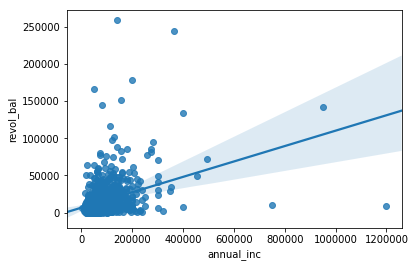

In [53]:
sns.regplot(x="annual_inc", y="revol_bal", data=data)
# sns.plt.show()

## Resolve Outlier

In [38]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))


def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

TypeError: object of type 'zip' has no len()

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warning

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warning

TypeError: array([1]) is not JSON serializable

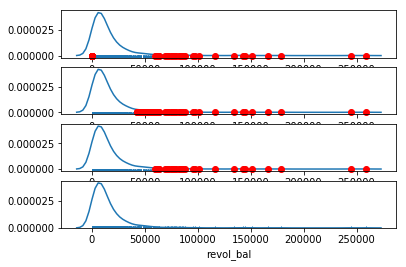

In [39]:
plotOutlier(data.revol_bal.sample(1244))

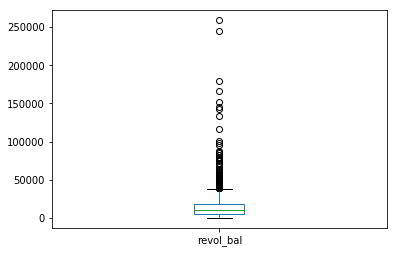

In [40]:
data.revol_bal.plot.box()

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: object of type 'zip' has no len()

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


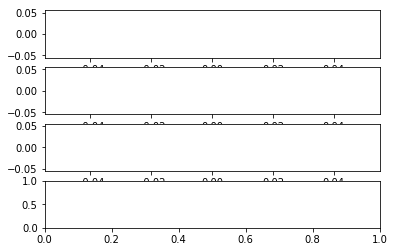

In [41]:
plotOutlierFree(data.revol_bal.sample(1244))

In [42]:
daff = pd.DataFrame()
daff['revol_bal'] = data.revol_bal
revol_balNew = replaceOutlier(data.revol_bal, replace='minUpper')
daff['revol_bal_new'] = revol_balNew
data['revol_bal_new'] = revol_balNew
daff[1240:]

TypeError: object of type 'zip' has no len()

TypeError: object of type 'zip' has no len()

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warning

/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "
/home/notula/PycharmProjects/finhacks-data-bca/venv/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warning

TypeError: array([1]) is not JSON serializable

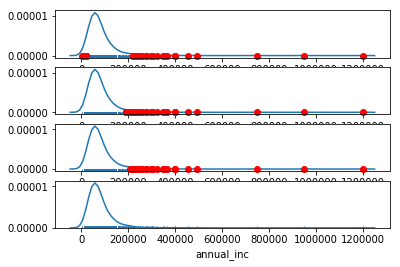

In [43]:
plotOutlier(data.annual_inc.sample(1244))

In [ ]:
data.annual_inc.plot.box()

In [ ]:
plotOutlierFree(data.annual_inc.sample(1244))

In [44]:
daff['annual_inc'] = data.annual_inc
annual_incNew = replaceOutlier(data.annual_inc, replace='minUpper')
daff['annual_inc_new'] = annual_incNew
data['annual_inc_new'] = annual_incNew
daff[1240:]

TypeError: object of type 'zip' has no len()

In [45]:
daff.corr()

,revol_bal,annual_inc
revol_bal,1.000000,0.358968
annual_inc,0.358968,1.000000


In [ ]:
# daff = daff.sort_values("revol_bal_new")
# daff.plot( y=['revol_bal_new', 'annual_inc_new'], kind="bar")

In [ ]:
# daff = daff.sort_values("annual_inc_new")
# daff.plot( y=['revol_bal_new', 'annual_inc_new'], kind="bar")

## Find Out Correlation

1. https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
1. https://medium.com/@hafizhan.aliady/market-basket-analysis-acossiation-rule-menggunakan-python-1012f9e1611d


In [30]:
# https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
sns.distplot(daff.annual_inc_new.dropna())
sns.plt.show()

sns.distplot(daff.revol_bal_new.dropna())
sns.plt.show()

NameError: name 'daff' is not defined

In [ ]:
# sns.jointplot(data=daff, x='annual_inc_new', y='revol_bal_new', kind='reg', color='g')
# plt.show()

In [ ]:
# df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
# sns.heatmap(df, annot=True, fmt=".1f")
# plt.show()

# sns.heatmap(data.corr(), annot=True, fmt=".2f")
# plt.show()

# Pertanyaan 2
Berdasarkan kategori purpose (tujuan pinjaman) yang paling banyak ditemukan nasabah mengalami gagal bayar(not_paid=1), berapa banyak nasabah yang mengalami gagal bayar pada kategori tersebut?


In [ ]:
print (data['purpose'].value_counts())
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="purpose", data=data)

# Pertanyaan 3
Apakah data loan (dataset 1) tersebut dikategorikan sebagai data yang akan mengalami masalah '**imbalanced class**'?

1. https://elitedatascience.com/imbalanced-classes
1. https://datascience.stackexchange.com/questions/11404/python-handling-imbalance-classes-in-python-machine-learning
1. 
1. 

In [ ]:
print (data['not_paid'].value_counts())
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="not_paid", data=data)

In [ ]:
# data[:6]
print((627/(627+617)), (617/(627+617)))

## praprocessing (encodde categorical data)
1. https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float
1. http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html
1. http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [ ]:
from sklearn import preprocessing
newData = data
le = preprocessing.LabelEncoder()
newData['purpose'] = le.fit_transform(data['purpose'].values.tolist())
newData['verification_status'] = le.fit_transform(data['verification_status'].values.tolist())
newData['grade'] = le.fit_transform(data['grade'].values.tolist())
newData['home_ownership'] = le.fit_transform(data['home_ownership'].values.tolist())
newData['initial_list_status'] = le.fit_transform(data['initial_list_status'].values.tolist())
newData[:6]


In [ ]:
# Separate input features (X) and target variable (y)
y = data.not_paid
X = data.drop(['not_paid','revol_bal','annual_inc'], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train model
clf_0 = LogisticRegression().fit(X, y)

In [ ]:
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
# How's the accuracy?
print( accuracy_score(pred_y_0, y) )
# 0.5988745980707395

In [ ]:
# Should we be excited?
print( np.unique( pred_y_0 ) )
# [0 1]

In [ ]:
# data is ballance

# Pertanyaan 4
Menggunakan train dataset 1, buat sebuah model regresi logistik untuk memprediksi peluang default (not_paid) nasabah dengan variabel purpose, int_rate, installment, annual_inc, verified, home_ownership dan grdCtoA sebagai variabel prediktornya. Gunakan hasil model untuk menjawab pertanyaan 4 dan 5

Variabel manakah yang memiliki korelasi negatif terhadap kenaikan odds default (not_paid=1)?

1. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
1. http://kevinyuan.ca/2016/08/01/Interpreting-Logistic-Regression/
1. https://www.bogotobogo.com/python/scikit-learn/logistic_regression.php
1. http://blog.yhat.com/posts/logistic-regression-and-python.html
1. http://blog.yhat.com/posts/logistic-regression-python-rodeo.html

1. https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
1. https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/

In [3]:
datatrain = pd.read_csv('dataset/train1.csv').drop('Unnamed: 0', axis = 1)
datatrain[:6]
datatest = pd.read_csv('dataset/test1.csv').drop('Unnamed: 0', axis = 1)
datatest[:6]

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,w,debt_consolidation,10.91,130.79,49000.0,5.12,Not Verified,B,2016,5,0,MORTGAGE,1,10.799576,0,1
1,w,credit_card,10.91,915.50,95000.0,33.11,Not Verified,B,27588,1,0,RENT,1,11.461632,0,1
2,w,home_improvement,17.09,713.96,150000.0,14.26,Source Verified,D,27024,8,0,MORTGAGE,1,11.918391,1,0
3,w,debt_consolidation,18.06,408.73,85000.0,17.66,Verified,D,11719,1,0,RENT,0,11.350407,1,0
4,w,debt_consolidation,18.06,578.93,40000.0,25.32,Source Verified,D,15264,2,0,RENT,1,10.596635,1,0
5,w,debt_consolidation,22.91,579.95,50000.0,22.44,Source Verified,E,0,0,1,MORTGAGE,1,10.819778,1,0


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datatrain['purpose'] = le.fit_transform(datatrain['purpose'].values.tolist())
datatrain['verification_status'] = le.fit_transform(datatrain['verification_status'].values.tolist())
datatrain['grade'] = le.fit_transform(datatrain['grade'].values.tolist())
datatrain['home_ownership'] = le.fit_transform(datatrain['home_ownership'].values.tolist())
datatrain['initial_list_status'] = le.fit_transform(datatrain['initial_list_status'].values.tolist())
datatrain[:6]
datatest['purpose'] = le.fit_transform(datatest['purpose'].values.tolist())
datatest['verification_status'] = le.fit_transform(datatest['verification_status'].values.tolist())
datatest['grade'] = le.fit_transform(datatest['grade'].values.tolist())
datatest['home_ownership'] = le.fit_transform(datatest['home_ownership'].values.tolist())
datatest['initial_list_status'] = le.fit_transform(datatest['initial_list_status'].values.tolist())
datatest[:6]

,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,1,1,10.91,130.79,49000.0,5.12,0,1,2016,5,0,0,1,10.799576,0,1
1,1,0,10.91,915.50,95000.0,33.11,0,1,27588,1,0,2,1,11.461632,0,1
2,1,2,17.09,713.96,150000.0,14.26,1,3,27024,8,0,0,1,11.918391,1,0
3,1,1,18.06,408.73,85000.0,17.66,2,3,11719,1,0,2,0,11.350407,1,0
4,1,1,18.06,578.93,40000.0,25.32,1,3,15264,2,0,2,1,10.596635,1,0
5,1,1,22.91,579.95,50000.0,22.44,1,4,0,0,1,0,1,10.819778,1,0


In [ ]:
newData.corr()

In [55]:
# Separate input features (X) and target variable (y)
y_train = datatrain.not_paid
X_train = datatrain[['purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA']]
y_test = datatest.not_paid
X_test = datatest[['purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA']]

from sklearn.linear_model import LogisticRegression
# Train model
clf_0 = LogisticRegression().fit(X_train, y_train)

# Predict on training set
pred_y_0 = clf_0.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
# How's the accuracy?
print("accuracy: %.3f" % accuracy_score(pred_y_0, y_test) )
# 0.5988745980707395

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
logreg = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

accuracy: 0.583
10-fold cross validation average accuracy: 0.574


In [13]:
X_train.corr()

,purpose,int_rate,installment,annual_inc,verified,home_ownership,grdCtoA
purpose,1.000000,0.008768,0.079138,0.034284,0.067668,-0.043990,0.011499
int_rate,0.008768,1.000000,0.247354,-0.036179,0.193488,0.083356,-0.738046
installment,0.079138,0.247354,1.000000,0.295911,0.186881,-0.057949,-0.149601
annual_inc,0.034284,-0.036179,0.295911,1.000000,0.054814,-0.110086,0.032094
verified,0.067668,0.193488,0.186881,0.054814,1.000000,-0.040141,-0.179431
home_ownership,-0.043990,0.083356,-0.057949,-0.110086,-0.040141,1.000000,-0.075942
grdCtoA,0.011499,-0.738046,-0.149601,0.032094,-0.179431,-0.075942,1.000000


In [29]:
import numpy as np
print(X_train.columns[:])
print(np.exp(clf_0.coef_))

print('intercept:', clf_0.intercept_)
print('coefficient:', clf_0.coef_[0])

Index(['purpose', 'int_rate', 'installment', 'annual_inc', 'verified',
       'home_ownership', 'grdCtoA'],
      dtype='object')
[[0.99876535 1.00412702 1.00101238 0.99999448 1.00285639 0.99927478
  0.98659634]]
intercept: [-0.00741719]
coefficient: [-1.23541200e-03  4.11852508e-03  1.01187093e-03 -5.52306934e-06
  2.85231793e-03 -7.25484153e-04 -1.34943012e-02]


In [27]:
# https://stackoverflow.com/questions/37647396/statsmodels-logistic-regression-odds-ratio?rq=1
import statsmodels.api as sm

res = sm.Logit(y_train, X_train).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.665788
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               not_paid   No. Observations:                 1244
Model:                          Logit   Df Residuals:                     1237
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Sep 2018   Pseudo R-squ.:                 0.03943
Time:                        09:52:51   Log-Likelihood:                -828.24
converged:                       True   LL-Null:                       -862.23
                                        LLR p-value:                 1.056e-12
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
purpose            0.0653      0.075      0.870      0.384      -0.082       0.213
int_rate          -0.0081      0.009     -0.902      0.367      -0.026       0.009
installment        0.0010      0.000      4.599      0.000       0.001       0.001
annual_inc     -4.065e-06   1.14e-06     -3.559      0.000    -6.3e-06   -1.83e-06
verified           0.1919      0.123      1.564      0.118      -0.049       0.432
home_ownership     0.0532      0.063      0.851      0.395      -0.069       0.176
grdCtoA           -0.6033      0.121     -4.975      0.000      -0.841      -0.366
==================================================================================
"""

In [28]:
print(np.exp(res.params))
params = res.params
conf = res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

purpose           1.067511
int_rate          0.991975
installment       1.001021
annual_inc        0.999996
verified          1.211596
home_ownership    1.054644
grdCtoA           0.546981
dtype: float64
                    2.5%     97.5%        OR
purpose         0.921414  1.236773  1.067511
int_rate        0.974764  1.009489  0.991975
installment     1.000586  1.001456  1.001021
annual_inc      0.999994  0.999998  0.999996
verified        0.952545  1.541098  1.211596
home_ownership  0.933006  1.192140  1.054644
grdCtoA         0.431254  0.693762  0.546981


# Pertanyaan 5
Jika pada model regresi logistik diperoleh koefisien dari variabel gradeCtoA adalah -0.3298. Dengan mengasumsikan variabel lain konstan, berapa odds default (not_paid=1) untuk nasabah yang memiliki grad A-C (gradeCtoA=1) dibandingkan dengan nasabah yang memiliki grade loan lain? bulatkan hasil anda hingga 3 angka dibelakang koma (contoh : 4.323 atau 16.423)


In [ ]:
datatrain = pd.read_csv('dataset/train1.csv').drop('Unnamed: 0', axis = 1)
datatrain[:6]

In [ ]:
datatest = pd.read_csv('dataset/test1.csv').drop('Unnamed: 0', axis = 1)
datatest[:6]

In [ ]:
print(datatrain.shape, datatest.shape)

In [ ]:
datatrain.groupby('initial_list_status').mean()

In [ ]:
datatrain.groupby('purpose').mean()

In [ ]:
datatrain.groupby('verification_status').mean()

In [ ]:
datatrain.groupby('grade').mean()

In [ ]:
datatrain.groupby('home_ownership').mean()

In [ ]:
from sklearn import preprocessing

newDatatrain = datatrain
le = preprocessing.LabelEncoder()
newDatatrain['purpose'] = le.fit_transform(datatrain['purpose'].values.tolist())
newDatatrain['verification_status'] = le.fit_transform(datatrain['verification_status'].values.tolist())
newDatatrain['grade'] = le.fit_transform(datatrain['grade'].values.tolist())
newDatatrain['home_ownership'] = le.fit_transform(datatrain['home_ownership'].values.tolist())
newDatatrain['initial_list_status'] = le.fit_transform(datatrain['initial_list_status'].values.tolist())
newDatatrain[:6]


In [ ]:
plotOutlier(newDatatrain.annual_inc.sample(1244))

In [ ]:
plotOutlierFree(newDatatrain.annual_inc.sample(1244))

In [ ]:
newDatatrain['annual_inc'] = replaceOutlier(newDatatrain.annual_inc, replace='minUpper')
newDatatrain['installment'] = replaceOutlier(newDatatrain.installment, replace='minUpper')
newDatatrain['int_rate'] = replaceOutlier(newDatatrain.int_rate, replace='minUpper')

In [ ]:
newDatatest = datatest
le = preprocessing.LabelEncoder()
newDatatest['purpose'] = le.fit_transform(datatest['purpose'].values.tolist())
newDatatest['verification_status'] = le.fit_transform(datatest['verification_status'].values.tolist())
newDatatest['grade'] = le.fit_transform(datatest['grade'].values.tolist())
newDatatest['home_ownership'] = le.fit_transform(datatest['home_ownership'].values.tolist())
newDatatest['initial_list_status'] = le.fit_transform(datatest['initial_list_status'].values.tolist())
newDatatest[:6]

In [ ]:
# Separate input features (X) and target variable (y) : train data
y_train = newDatatrain.not_paid
X_train = newDatatrain[['purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA']]

# Separate input features (X) and target variable (y) : test data
y_test = newDatatest.not_paid
X_test = newDatatest[['purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA']]

X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)
# X_test

# # Separate input features (X) and target variable (y)
# y = newDatatest.not_paid
# X = newDatatest[['purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA']]

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
# rfe = rfe.fit(X, y)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

## Implementing the model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

## Logistic Regression Model Fitting

In [ ]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
import numpy as np
np.exp(logreg.coef_)
# 'purpose','int_rate','installment','annual_inc','verified','home_ownership', 'grdCtoA'
# array([[1.09940559, 1.00649788, 1.0010515 , 0.99999544, 1.19384972,
#         1.06135235, 0.62382371]])

### Predicting the test set results and caculating the accuracy¶

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Cross Validation¶

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Pertanyaan 6
Diberikan cross tabulasi hasil perbandingan nilai aktual dan prediksi menggunakan model regresi logistik berikut :
```
         actual
predicted  0  1
        0 93 54
        1 68 97
```
Berapa nilai recall/sensitivity berdasarkan confusion matrix diatas?

1. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
1. http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [ ]:
import numpy as np
from __future__ import division
# cm = np.array([[2,1,0], [3,4,5], [6,7,8]])
# true_pos = np.diag(cm)
# false_pos = np.sum(cm, axis=0) - true_pos
# false_neg = np.sum(cm, axis=1) - true_pos
true_pos = 97
false_pos = 54
false_neg = 68

# precision = np.sum(true_pos / true_pos+false_pos)
# recall = np.sum(true_pos / true_pos + false_neg)
recall = true_pos/(true_pos + false_neg)
recall

# Dataset 2

# Pertanyaan 7
Variabel apa yang menjadi variabel paling tidak penting (most unimportant variable) dalam menentukan status default nasabah dalam model decision tree tersebut?

1. http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
1. https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
1. http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
# balance_data = pd.read_csv(
# 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
#                            sep= ',', header= None)
balance_data = pd.read_csv('dataset/train2.csv').drop('Unnamed: 0', axis = 1)
balance_data_test = pd.read_csv('dataset/test2.csv').drop('Unnamed: 0', axis = 1)

In [ ]:
print ("Dataset Lenght:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

In [ ]:
print ("Dataset:: ")
balance_data.head()

## Praprocess

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
balance_data['checking_balance'] = le.fit_transform(balance_data['checking_balance'].values.tolist())
balance_data['credit_history'] = le.fit_transform(balance_data['credit_history'].values.tolist())
balance_data['purpose'] = le.fit_transform(balance_data['purpose'].values.tolist())
balance_data['savings_balance'] = le.fit_transform(balance_data['savings_balance'].values.tolist())
balance_data['employment_duration'] = le.fit_transform(balance_data['employment_duration'].values.tolist())
balance_data['other_credit'] = le.fit_transform(balance_data['other_credit'].values.tolist())
balance_data['housing'] = le.fit_transform(balance_data['housing'].values.tolist())
balance_data['job'] = le.fit_transform(balance_data['job'].values.tolist())
balance_data['phone'] = le.fit_transform(balance_data['phone'].values.tolist())
balance_data.head()

balance_data_test['checking_balance'] = le.fit_transform(balance_data_test['checking_balance'].values.tolist())
balance_data_test['credit_history'] = le.fit_transform(balance_data_test['credit_history'].values.tolist())
balance_data_test['purpose'] = le.fit_transform(balance_data_test['purpose'].values.tolist())
balance_data_test['savings_balance'] = le.fit_transform(balance_data_test['savings_balance'].values.tolist())
balance_data_test['employment_duration'] = le.fit_transform(balance_data_test['employment_duration'].values.tolist())
balance_data_test['other_credit'] = le.fit_transform(balance_data_test['other_credit'].values.tolist())
balance_data_test['housing'] = le.fit_transform(balance_data_test['housing'].values.tolist())
balance_data_test['job'] = le.fit_transform(balance_data_test['job'].values.tolist())
balance_data_test['phone'] = le.fit_transform(balance_data_test['phone'].values.tolist())
balance_data_test.head()

## Process

In [ ]:
# X = balance_data.values[:, 1:5]
# Y = balance_data.values[:,0]
import numpy
X_train = balance_data.values[:, :15]
X_test = balance_data_test.values[:, :15]
y_train = balance_data.values[:,16]
y_test = balance_data_test.values[:,16]
# X = balance_data.values[:, :15]
# Y = balance_data.values[:,16]
# X = np.array([[X_train,y_train]])
# Y = []
# X = X_train
# for x in X_test:
#     X.append(x)
# Y = y_train
# for y in y_test:
#     Y.append(y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

In [ ]:
# clf_gini.predict([[4, 4, 3, 3]])

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

In [ ]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [ ]:
# features = ["1", "2", "3", "4"]#list(balance_data.columns[1:])
# targets = ["B","R","L"]
# get_code(clf_gini, features, targets)

features = list(balance_data.columns[:-1])
targets = ["yes","no"]
get_code(clf_gini, features, targets)

In [ ]:
amount	employment_duration	percent_of_income	years_at_residence	housing	existing_loans_count	job	dependents	phone	default
clf_gini.feature_importances_
# clf_gini.tree_

# import pprint
# pprint.pprint(clf_gini.tree_)

# Pertanyaan 8
Diberikan cross tabulasi perbandingan klasifikasi default hasil prediksi dan aktual menggunakan model decision tree sebagai berikut :
```
         actual
predicted no yes
      no  57  12
      yes 16  15
```
Berapa banyak observasi yang yang salah diklasifikasikan oleh model decision tree tersebut?

In [ ]:
import numpy as np
from __future__ import division
# cm = np.array([[2,1,0], [3,4,5], [6,7,8]])
# true_pos = np.diag(cm)
# false_pos = np.sum(cm, axis=0) - true_pos
# false_neg = np.sum(cm, axis=1) - true_pos
true_pos = 15
false_pos = 16
false_neg = 12

# precision = np.sum(true_pos / true_pos+false_pos)
# recall = np.sum(true_pos / true_pos + false_neg)
precision = true_pos / (true_pos+false_pos)
recall = true_pos/(true_pos + false_neg)
print(recall, precision)

In [ ]:
print((true_pos+57) / (true_pos+false_pos+false_neg+57))

# Pertanyaan 9
Berdasarkan tabel cross tabulasi sebelumnya, metrik pengukuran apa yang dapat digunakan sebagai pertimbangan pemilihan model?

In [ ]:
print((15+57) / (15+12+16+57))

# Pertanyaan 10
Metode yang tidak tepat untuk mengevaluasi masalah klasifikasi dan membandingkan performa klasifier adalah :

In [ ]:
cleanCol = []
for i in range(len(data.columns)):
    cleanCol.append(data.columns[i].replace('-', ''))
    
data.columns = cleanCol

In [ ]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [ ]:
def add_freq():
    ncount = len(data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

Getting a sense of how balanced or imbalanced is the outcome variable

In [ ]:
ax = sns.countplot(x = data.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

add_freq()

plt.show()

### Outlier detection

In [ ]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))


def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

#### RevolvingUtilizationOfUnsecuredLines var

In [ ]:
plotOutlier(data.RevolvingUtilizationOfUnsecuredLines.sample(1000))

The nature of the variable allows coding every extreme value as a fixed number without losing to much predictive power

In [ ]:
revNew = []
for val in data.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [ ]:
data.RevolvingUtilizationOfUnsecuredLines = revNew

#### Age var

In [ ]:
data.age.plot.box()

In [ ]:
for i in range(16,30):
    print i, len(data[data.age < i])

22 is the youngest age in the data one outlier at 0	

In [ ]:
ageNew = []
for val in data.age:
    if val > 22:
        ageNew.append(val)
    else:
        ageNew.append(22)
        
data.age = ageNew

#### NumberOfTime3059DaysPastDueNotWorse var

In [ ]:
from collections import Counter
Counter(data.NumberOfTime3059DaysPastDueNotWorse)

In [ ]:
New = []
med = data.NumberOfTime3059DaysPastDueNotWorse.median()
for val in data.NumberOfTime3059DaysPastDueNotWorse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

data.NumberOfTime3059DaysPastDueNotWorse = New

#### DebtRatio var

In [ ]:
outlierRatio(data.DebtRatio)

In [ ]:
plotOutlier(data.DebtRatio.sample(1000))

In [ ]:
ax = sns.countplot(mad_based_outlier(data.DebtRatio))
add_freq()

In [ ]:
minUpperBound = min([val for (val, out) in zip(data.DebtRatio, mad_based_outlier(data.DebtRatio)) if out == True])

In [ ]:
newDebtRatio = []
for val in data.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

In [ ]:
data.DebtRatio = newDebtRatio

In [ ]:
data.DebtRatio.describe()

#### Monthly income var

In [ ]:
# plotOutlier(data.MonthlyIncome.sample(1000))
# data.MonthlyIncome.sample(1000)

In [ ]:
plotOutlierFree(data.MonthlyIncome.sample(1000))

Remove outlier from the Monthly income col by outlierVote classifier and replace them with a high fixed value

In [ ]:
incomeNew = replaceOutlier(data.MonthlyIncome, replace='minUpper')

In [ ]:
data.MonthlyIncome = incomeNew

#### NumberOfTimes90DaysLate var

In [ ]:
new = removeSpecificAndPutMedian(data.NumberOfTimes90DaysLate)

In [ ]:
data.NumberOfTimes90DaysLate = new

#### NumberRealEstateLoansOrLines var

In [ ]:
realNew = []
for val in data.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

In [ ]:
data.NumberRealEstateLoansOrLines = realNew

#### NumberOfTime6089DaysPastDueNotWorse var

In [ ]:
new = removeSpecificAndPutMedian(data.NumberOfTime6089DaysPastDueNotWorse)

In [ ]:
data.NumberOfTime6089DaysPastDueNotWorse = new

#### NumberOfDependents var

In [ ]:
depNew = []
for var in data.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [ ]:
data.NumberOfDependents = depNew

## NA count

In [ ]:
from collections import Counter

In [ ]:
def naCount(data):
    naCount = {}
    for col in data.columns:
        colNa = 0
        for val in data[col].isnull():
            if val == True:
                colNa += 1
        naCount[col] = [colNa, '{:0.2f}%'.format((float(colNa)/len(data))*100)]

    return naCount

In [ ]:
def cvDictGen(functions, scr, X_train=X_train, y_train=y_train, cv=3, verbose=1, n_jobs=1):
    cvDict = {}
    for func in functions:
#         cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, n_jobs=n_jobs)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

NumberOfDependents NA replacment

In [ ]:
depNew = []
med = data.NumberOfDependents.median()
for val in data.NumberOfDependents:
    if val.is_integer() == False:
        depNew.append(med)
    else:
        depNew.append(val)

In [ ]:
data.NumberOfDependents = depNew

#### Build a model to predict NA values from the data and plug them in

In [ ]:
train = data[data.MonthlyIncome.isnull() == False]
test = data[data.MonthlyIncome.isnull() == True]

In [ ]:
train.shape, test.shape

In [ ]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import RandomizedSearchCV 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

In [ ]:
adaMod = AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=1.0, loss='linear')

In [ ]:
gbMod = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=300, subsample=1.0, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, init=None,
                                  random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None,
                                  warm_start=False)

In [ ]:
rfMod = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True,
                              oob_score=False, n_jobs=N_JOBS, random_state=None, verbose=1)

In [ ]:
knnMod = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

Normalize the CV scores

In [ ]:
cvDict = cvDictGen(functions=[lmMod, adaMod, gbMod, rfMod, knnMod], scr='roc_auc', n_jobs=N_JOBS)

In [ ]:
cvDictNormalize(cvDict)

#### Replace NA in monthly income with the predicted values from the linear regression as it did pretty well compared to the other, more computationly expencive models

In [ ]:
pred = lmMod.predict(X_test)

In [ ]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)

In [ ]:
testFull = data[data.MonthlyIncome.isnull() == True]

In [ ]:
testFull['MonthlyIncome'] = predNoZero

In [ ]:
monNew = []
for index in data.index:
    if data.MonthlyIncome[index].is_integer() == True:
        monNew.append(data.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
monNew

In [ ]:
data.MonthlyIncome = monNew

## Train-Test split

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)

xScaled = sScaler.fit_transform(X_train)

forPca = pd.DataFrame(xScaled)

from sklearn.decomposition import PCA

pcaMod = PCA(n_components=2)

xPca = pcaMod.fit_transform(X)

xPcaDataframe = pd.DataFrame(xPca, columns=['PC1', 'PC2'])

xPcaDataframe['cat'] = y

In [ ]:
ax = sns.lmplot(data = xPcaDataframe, x='PC2', y='PC1', hue='cat', size=10, aspect=20, fit_reg=False,
               scatter_kws={'alpha': 0.3})
fig = plt.gcf()
fig.set_size_inches(15, 7)

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import minmax_scale

In [ ]:
xScaled = minmax_scale(X, feature_range=(0, 1))

In [ ]:
ldaMod = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=2,
                                    store_covariance=False, tol=0.0001)

In [ ]:
fittedLdaMod = ldaMod.fit(xScaled, y).transform(xScaled)

ldaDf = pd.DataFrame(fittedLdaMod, columns=['one', 'two'])

ldaDf['cat'] = y

In [ ]:
ax = sns.lmplot(data = ldaDf, x='one', y='two', hue='cat', size=30, aspect=5, fit_reg=False, scatter_kws={'alpha': 0.3})
fig = plt.gcf()
fig.set_size_inches(15, 7)

#### Add shrinkage

In [ ]:
ldaModS = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', priors=None, n_components=2,
                                    store_covariance=False, tol=0.0001)

In [ ]:
fittedLdaModS = ldaModS.fit(xScaled, y).transform(xScaled)

ldaDfS = pd.DataFrame(fittedLdaModS, columns=['one', 'two'])

ldaDfS['cat'] = y

In [ ]:
ax = sns.lmplot(data = ldaDf, x='one', y='two', hue='cat', size=50, aspect=5, fit_reg=False, scatter_kws={'alpha': 0.3})
fig = plt.gcf()
fig.set_size_inches(15, 7)

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
import random

In [ ]:
tsneMod = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, learning_rate=50., n_iter=500,
               metric='euclidean', init='random', verbose=2, random_state=None)

In [ ]:
n = 7000
X_data, X_none, y_data, y_none = train_test_split(X, y, test_size=(1-(n/float(len(data)))))

In [ ]:
xTsne = tsneMod.fit_transform(X_data)

In [ ]:
xTsneDataFrame = pd.DataFrame(xTsne, columns=['one', 'two'])

y_data.index = range(0,len(xTsneDataFrame))

xTsneDataFrame['cat'] = y_data

In [ ]:
ax = sns.lmplot(data = xTsneDataFrame, x='one', y='two', hue='cat', size=70, aspect=5, fit_reg=False, palette='Set2',
               scatter_kws={"s": 50, 'alpha': 0.5})
fig = plt.gcf()
fig.set_size_inches(15, 7)

## Making predictions

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [ ]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [ ]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [ ]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [ ]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=N_JOBS, random_state=None, verbose=0)

In [ ]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc', n_jobs=N_JOBS)

In [ ]:
cvDictNormalize(cvD)

GB and ADA seem to preform the best out-of-the-box

## Hyper parameter optimization

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

Ada model

In [ ]:
adaHyperParams = {'n_estimators': [10,50,100,200,400]}

In [ ]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2, n_jobs=N_JOBS).fit(X_train, y_train)

In [ ]:
gridSearchAda.best_params_, gridSearchAda.best_score_

GB model

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [ ]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2, n_jobs=N_JOBS).fit(X_train, y_train)

In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

Fit the best GB and ADA models

In [ ]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [ ]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [ ]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

In [ ]:
cvDictNormalize(cvDictHPO)

## Plot ROC curve with CV

**plotCvRocCurve** will plot the CV ROC curve with nfolds

**rocZeroOne** will compute the best cut-off point for the classifiers

In [ ]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.cross_validation import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(y, n_folds=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print '\n' + 'Best point on the ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100)
    print '\n' + 'Best Cut-Off point: {:0.4f}'.format(bestCutOff1)

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)

In [ ]:
plotCvRocCurve(X, y, gridSearchGB.best_estimator_)

In [ ]:
rocZeroOne(y_test, bestGbModFitted.predict_proba(X_test))

In [ ]:
plotCvRocCurve(X, y, gridSearchAda.best_estimator_)

In [ ]:
rocZeroOne(y_test, bestAdaModFitted.predict_proba(X_test))

## Confusion matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title = 'Confusion matrix', cmap=plt.cm.Blues):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print 'Classification Report:\n'
    print classification_report(y_test, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    def plot_confusion_matrix_plot(cm, title = 'Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(y_test.unique()))
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    print '\n Confusion matrix, without normalization: \n'
    print cm
    plot_confusion_matrix_plot(cm=cm)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\n Normalized confusion matrix \n')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix_plot(cm_normalized, title='Normalized confusion matrix')

def makePredThresh(fittedCls, thr = 0.5, X_test=X_test):
    prob = fittedCls.predict_proba(X_test)[: ,1]
    final = []
    for p in prob:
        if p >= thr:
            final.append(1)
        else:
            final.append(0)
    
    return final

Make predicions from the GB model with the optimal threshold calculated before 

In [ ]:
pred = makePredThresh(bestGbModFitted, thr=0.0645)

In [ ]:
plot_confusion_matrix(y_test, pred)

Make predictions from the ADA model

In [ ]:
predAda = makePredThresh(bestAdaModFitted, thr=0.4982)

In [ ]:
plot_confusion_matrix(y_test, predAda)